# Improving neural network performance Part 2 - Data Augmentation

In [ ]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

* Data augmentation
 - Image augmentation
 - Image pipelines

## 1 Data augmentation

### 1.1 Definitions

In the previous notebook you have seen the effects of underfitting and overfitting of models on data. These problems are especially prevalent if your training dataset is very small or limited in variety. In this case your model will either not learn enough about your data, or will memorize your training data and not generalize to new data.

Data augmentation is a technique used in machine learning and specifically in the training of neural networks to increase the amount and diversity of training data. The primary goal of data augmentation is to improve the model's performance by reducing overfitting and helping the model generalize better to unseen data.

Data augmentation is achieved by applying various **transformations** to the existing data samples to create new, modified versions of them. With image data, these transformations can include rotation, scaling, flipping, translation, cropping, noise addition, color manipulation, and more. The key is to make these modifications in such a way that they **preserve the essential features** of the original data while **introducing variability**.

Data augmentation is typically used in the following situations:

1. **Limited dataset:** When the available training data is limited, data augmentation can help create a larger and more diverse dataset, reducing the chances of overfitting and improving model performance.
2. **Imbalanced dataset:** When the training data is imbalanced, with some classes having significantly fewer samples than others, data augmentation can help balance the distribution of samples across classes and improve the model's ability to recognize underrepresented classes.
3. **Domain-specific variations:** When the model needs to be robust against domain-specific variations, such as different lighting conditions or viewpoints in images, data augmentation can help the model learn to recognize these variations by simulating them in the training data.

Overall, data augmentation is an important technique to enhance the performance and robustness of neural networks, particularly when dealing with limited or imbalanced datasets.

### 1.2 Data augmentation illustration

To visualize what happens when we implement data augmentation, let us take an example of a single image.

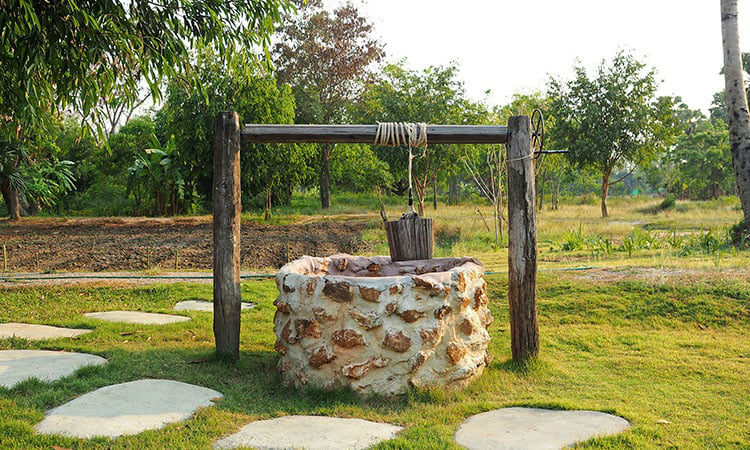

In [ ]:
# Imports PIL module 
from PIL import Image
  
# Read image
img = Image.open("/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_15/well.jpg") 
  
# Show image 
display(img)

Now let us manipulate this image to create a larger image dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


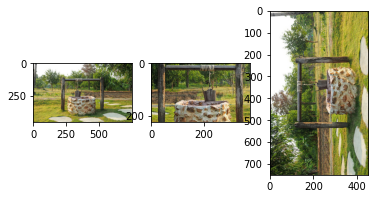

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

pix = np.array(img) # Convert PIL image to numpy

# Apply a flip transformation
flipped = tf.image.flip_left_right(pix)

# Apply a zoom-in transformation
cropped = tf.image.central_crop(pix, central_fraction=0.5)

# Apply a rotation by 90 degrees
rotated = tf.image.rot90(pix)

# Plot results
plt.subplot(1, 3, 1)
plt.imshow(flipped)
plt.subplot(1, 3, 2)
plt.imshow(cropped)
plt.subplot(1, 3, 3)
plt.imshow(rotated)

**Well, well, well! What do we have here?**

By adding random translations, rotations, flips, zoom-ins, zoom-outs, color channel swaps, etc to this one image, we could generate several new images. These images have the same key feature information, but they will also have additional variety. A neural network that sees this variety will learn better to generalize, by differentiating between the unchanging feature information and the varying added information. 

### 1.2 Data augmentation in neural networks with Keras

The code that follows in this notebook is based on this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation).

This tutorial demonstrates data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

You have already seen a brief example of image augmentation using the `tf.image` methods. There are several more augmentation methods such as `tf.image.flip_left_right`, `tf.image.rgb_to_grayscale`, `tf.image.adjust_brightness`, `tf.image.central_crop`, and `tf.image.stateless_random*`. 

In the rest of the notebook, you will learn how to apply data augmentation using the Keras preprocessing layers, such as `tf.keras.layers.Resizing`, `tf.keras.layers.Rescaling`, `tf.keras.layers.RandomFlip`, and `tf.keras.layers.RandomRotation`.

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

We begin by downloading the flowers dataset, that you used in the previous notebook. We perform some preprocessing to resize the images.

In [ ]:
# Download dataset

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Load data using Keras dataloader
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize data
normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)


228813984/228813984 [==============================] - 2s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


The flowers dataset has five classes.

In [ ]:
print(num_classes)

5


You can use the Keras preprocessing layers to resize your images to a consistent shape (with `tf.keras.layers.Resizing`), and to rescale pixel values (with `tf.keras.layers.Rescaling`).

In [ ]:
IMG_SIZE = 224

rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

You can use the Keras preprocessing layers for data augmentation as well, such as `tf.keras.layers.RandomFlip` and `tf.keras.layers.RandomRotation`.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

There are a variety of preprocessing layers you can use for data augmentation including `tf.keras.layers.RandomContrast`, `tf.keras.layers.RandomCrop`, `tf.keras.layers.RandomZoom`, and others.

We will now add the data augmentation and preprocessing layers to our model and train it on our dataset.

In [ ]:
IMG_SIZE = 224

rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

model = tf.keras.Sequential([
    # Add the preprocessing layers you created earlier.
    rescale,
    data_augmentation,
    # Rest of your model.
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument to `Model.compile`.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train for a few epochs:

In [ ]:
epochs=5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/5


92/92 [==============================] - 31s 127ms/step - loss: 1.2715 - accuracy: 0.4564 - val_loss: 1.0832 - val_accuracy: 0.5777
Epoch 2/5
92/92 [==============================] - 9s 100ms/step - loss: 1.0272 - accuracy: 0.5940 - val_loss: 0.9806 - val_accuracy: 0.6076
Epoch 3/5
92/92 [==============================] - 10s 114ms/step - loss: 0.9547 - accuracy: 0.6192 - val_loss: 0.9259 - val_accuracy: 0.6403
Epoch 4/5
92/92 [==============================] - 10s 114ms/step - loss: 0.8984 - accuracy: 0.6563 - val_loss: 0.9586 - val_accuracy: 0.6226
Epoch 5/5
92/92 [==============================] - 9s 95ms/step - loss: 0.8138 - accuracy: 0.6884 - val_loss: 0.8186 - val_accuracy: 0.6662


## 2 Exercises
It is possible to combine some of the regularization / hyperparameter tuning steps that you learned in the previous notebook with data augmentation on this dataset to get an accuracy of **over 75%**! Your task is to try and get the **highest possible validation accuracy** that you can on the flowers dataset. Note that multiple solutions may be possible, use trial and error to play around and find what works best for you!

If you are stuck, you can use this [tutorial](https://www.tensorflow.org/tutorials/images/classification#data_augmentation) as a hint.

In [ ]:
# def grayscale(image):
#     gray = tf.image.rgb_to_grayscale(image)
#     return gray

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)))
  model.add(layers.RandomContrast(0.1))
  model.add(layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2)))
  model.add(layers.RandomTranslation(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1)))
  model.add(layers.RandomRotation(factor=0.2))
  model.add(layers.RandomFlip("horizontal_and_vertical"))
  model.add(layers.RandomFlip("horizontal"))
  
 
  hp_learning_rate = hp.Choice("learning_rate", values=[0.01, 0.03])
  dropout = hp.Float(name="dropout", min_value=0.05, max_value=0.1, step=0.05)
  hp_layer = hp.Int("layer", min_value=64, max_value=512, step=64)
 

  for cl in range(hp.Int('conv_layers', min_value=6, max_value=8, default=6)):
    conv_filters = hp.Int('filters_' + str(cl), min_value=64, max_value=256, step=64)
    model.add(layers.Conv2D(conv_filters, 3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(dropout))

  model.add(tf.keras.layers.Flatten())

  for dense in range(hp.Int('dense_layers', min_value=4, max_value=6, default=4)):
    dense_units = hp.Int('dense_units_' + str(dense), min_value=64, max_value=512, step=64)
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout))

  model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])
  
  return model

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective="val_accuracy",
                     max_epochs=10,
                     factor=3,
                     directory="dir",
                     project_name="test3")

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

In [ ]:
tuner.search(train_ds, validation_data=val_ds, epochs=20, callbacks=[stop_early])

Trial 20 Complete [00h 00m 03s]

Best val_accuracy So Far: 0.36103543639183044
Total elapsed time: 00h 43m 40s

Search: Running Trial #21

Value             |Best Value So Far |Hyperparameter
0.01              |0.03              |learning_rate
0.1               |0.05              |dropout
64                |64                |layer
8                 |7                 |conv_layers
192               |64                |filters_0
256               |192               |filters_1
256               |192               |filters_2
256               |192               |filters_3
192               |64                |filters_4
128               |192               |filters_5
6                 |5                 |dense_layers
448               |64                |dense_units_0
256               |448               |dense_units_1
64                |64                |dense_units_2
256               |128               |dense_units_3
128               |256               |filters_6
384               |64

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/base_tuner.py", line 266, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/base_tuner.py", line 231, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/tuners/hyperband.py", line 419, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/tuner.py", line 213, in _build_and_fit_model
    model = self._try_build(hp)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/tuner.py", line 155, in _try_build
    model = self._bui

RuntimeError: ignored

## 2nd try

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
# Define model builder function
def model_builder2(hp):
    data_augmentation = keras.Sequential(
      [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(hp.Float('rotation_factor', min_value=0.1, max_value=0.3, step=0.05)),
        layers.RandomZoom(hp.Float('zoom_factor', min_value=0.1, max_value=0.3, step=0.05)),
      ]
    )

    model = keras.Sequential([
        data_augmentation,
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32), 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)),
        layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=32), 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)),
        layers.Flatten(),
        layers.Dense(hp.Int('dense_units', min_value=64, max_value=512, step=64), activation='relu'),
        layers.Dropout(hp.Float('dropout3', min_value=0.0, max_value=0.5, step=0.1)),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
    optimizer=keras.optimizers.Adam(
    hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

    return model

In [ ]:
# Create an instance of the tuner
tuner = kt.Hyperband(
        model_builder2,
        objective='val_accuracy',
        max_epochs=10,
        factor=3,
        directory='my_dir',
        project_name='intro_to_kt2'
        )

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [ ]:
tuner.search(train_ds, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])

Trial 30 Complete [00h 08m 59s]
val_accuracy: 0.6498637795448303

Best val_accuracy So Far: 0.692098081111908
Total elapsed time: 01h 11m 22s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping, reduce_lr])

Epoch 1/50


92/92 [==============================] - 30s 252ms/step - loss: 3.3000 - accuracy: 0.3948 - val_loss: 1.2024 - val_accuracy: 0.5054 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - 22s 241ms/step - loss: 1.1803 - accuracy: 0.5177 - val_loss: 1.0919 - val_accuracy: 0.5749 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - 22s 240ms/step - loss: 1.0141 - accuracy: 0.5930 - val_loss: 0.9579 - val_accuracy: 0.6172 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - 21s 234ms/step - loss: 0.9453 - accuracy: 0.6308 - val_loss: 0.9082 - val_accuracy: 0.6362 - lr: 0.0010
Epoch 5/50
92/92 [==============================] - 23s 255ms/step - loss: 0.9139 - accuracy: 0.6427 - val_loss: 0.9718 - val_accuracy: 0.6144 - lr: 0.0010
Epoch 6/50
92/92 [==============================] - 22s 239ms/step - loss: 0.8729 - accuracy: 0.6706 - val_loss: 0.8359 - val_accuracy: 0.6853 - lr: 0.0010
Epoch 7/50
92/92 [==============================] - 21s 233ms/step - loss: 

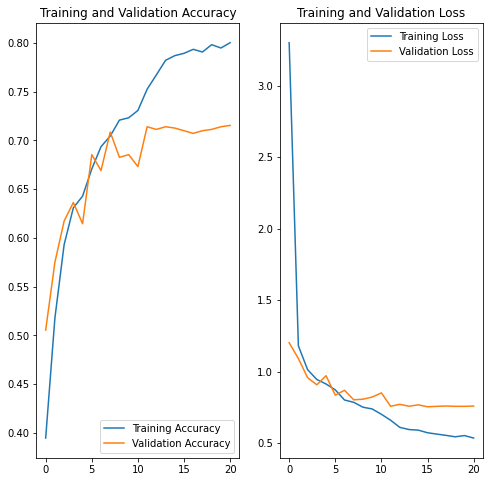

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(21)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 3rd try

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.6 MB/s eta 0:00:00


In [ ]:
# Download dataset

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Load data using Keras dataloader
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize data
normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)


228813984/228813984 [==============================] - 12s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# Define model builder function
def model_builder3(hp):
    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(hp.Float('rotation_factor', min_value=0.1, max_value=0.3, step=0.05)),
            layers.RandomZoom(hp.Float('zoom_factor', min_value=0.1, max_value=0.3, step=0.05)),
        ]
    )

    model = keras.Sequential([
        data_augmentation,
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    ])

    dropout = hp.Float(name="dropout", min_value=0.05, max_value=0.2, step=0.05)
   
    for cl in range(hp.Int('conv_layers', min_value=6, max_value=8, default=6)):
       
        conv_filters = hp.Int('filters_' + str(cl), min_value=16, max_value=128, step=16)
        model.add(layers.Conv2D(conv_filters, 3, padding='same', activation='relu'))
        model.add(layers.MaxPooling2D())

        model.add(layers.Dropout(dropout))

        model.add(layers.BatchNormalization())

    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout3', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(hp.Int('dense_units', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout3', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
tuner = kt.Hyperband(
        model_builder3,
        objective='val_accuracy',
        max_epochs=10,
        factor=3,
        directory='my_dir',
        project_name='tuning4'
        )

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-4)

In [ ]:
tuner.search(train_ds, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])

Trial 25 Complete [00h 02m 20s]
val_accuracy: 0.25749319791793823

Best val_accuracy So Far: 0.6825612783432007
Total elapsed time: 00h 36m 54s


# Different approach

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.6 MB/s eta 0:00:00


In [ ]:
# Download dataset

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Load data using Keras dataloader
batch_size = 128
img_height = 150
img_width = 150

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize data
normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
IMG_SIZE = 150

rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  # layers.RandomContrast()
])

model = tf.keras.Sequential([
    
    rescale,
    data_augmentation,
   
    layers.Conv2D(32, 3, padding = 'Same', activation ='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),


    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation = "softmax")
])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50


23/23 [==============================] - 33s 728ms/step - loss: 1.4564 - accuracy: 0.3481 - val_loss: 1.1757 - val_accuracy: 0.4905
Epoch 2/50
23/23 [==============================] - 14s 611ms/step - loss: 1.1511 - accuracy: 0.5146 - val_loss: 1.0593 - val_accuracy: 0.5777
Epoch 3/50
23/23 [==============================] - 15s 640ms/step - loss: 1.0023 - accuracy: 0.6022 - val_loss: 0.9435 - val_accuracy: 0.6008
Epoch 4/50
23/23 [==============================] - 14s 608ms/step - loss: 0.9144 - accuracy: 0.6431 - val_loss: 0.9165 - val_accuracy: 0.6431
Epoch 5/50
23/23 [==============================] - 14s 611ms/step - loss: 0.8756 - accuracy: 0.6570 - val_loss: 0.8771 - val_accuracy: 0.6431
Epoch 6/50
23/23 [==============================] - 16s 720ms/step - loss: 0.8284 - accuracy: 0.6798 - val_loss: 0.8697 - val_accuracy: 0.6608
Epoch 7/50
23/23 [==============================] - 15s 638ms/step - loss: 0.7961 - accuracy: 0.6887 - val_loss: 0.7885 - val_accuracy: 0.6948
Epoch 8/50

# FINAL FORM

In [1]:
!pip install -q -U keras-tuner
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00


In [2]:
# Download dataset

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Load data using Keras dataloader
batch_size = 128
img_height = 150
img_width = 150

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


num_classes = len(class_names)

228813984/228813984 [==============================] - 3s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [3]:
def model_builder_final(hp):
    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip("horizontal_and_vertical"),
            layers.RandomRotation(hp.Float('rotation_factor', min_value=0.1, max_value=0.3, step=0.1)),
            layers.RandomZoom(hp.Float('zoom_factor', min_value=0.1, max_value=0.3, step=0.1)),
        ]
    )

    model = keras.Sequential([
        data_augmentation,
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    ])

      
    for cl in range(hp.Int('conv_layers', min_value=4, max_value=6, default=6)):
       
        conv_filters = hp.Int('filters_' + str(cl), min_value=32, max_value=96, step=32)
        model.add(layers.Conv2D(conv_filters, 3, padding='same', activation='relu'))
        model.add(layers.MaxPooling2D())
        

    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=256, max_value=512, step=256), activation='relu'))
    model.add(layers.Dense(hp.Int('dense_units', min_value=256, max_value=512, step=128), activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=5e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [4]:
tuner_final = kt.Hyperband(model_builder_final,
                           objective='val_accuracy',
                           max_epochs=12,
                           factor=3,
                           directory='my_dir',
                           project_name='final3')

In [5]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=5e-4)

In [ ]:
tuner_final.search(train_ds, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])

Trial 18 Complete [00h 39m 57s]
val_accuracy: 0.6730245351791382

Best val_accuracy So Far: 0.6730245351791382
Total elapsed time: 03h 52m 35s

Search: Running Trial #19

Value             |Best Value So Far |Hyperparameter
0.1               |0.1               |rotation_factor
0.2               |0.2               |zoom_factor
6                 |4                 |conv_layers
64                |64                |filters_0
64                |64                |filters_1
96                |64                |filters_2
32                |32                |filters_3
32                |64                |filters_4
64                |64                |filters_5
512               |256               |dense_units
0.0010827         |0.0006114         |learning_rate
4                 |12                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4


23/23 [==============================] - 293s 12s/step - loss: 1.5079 - accuracy: 0.2912 - val_loss: 1.4681 - val_accuracy: 0.3324 - lr: 0.0011
Epoch 2/4
 4/23 [====>.........................] - ETA: 3:47 - loss: 1.3946 - accuracy: 0.3965

In [ ]:
best_hps = tuner_final.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner_final.hypermodel.build(best_hps)
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping, reduce_lr])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(21)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()